In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

# Encoding categorical data

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Anaconda3\envs\idp\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\idp\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [8]:
X

array([[0.0000000e+00, 0.0000000e+00, 2.2800000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [1.0000000e+00, 0.0000000e+00, 2.1700000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 1.1100000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.1800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 3.8100000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 4.0100000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

# Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Now let's make the ANN!
* Importing the Keras libraries and packages

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


* Initialising the ANN

In [15]:
classifier = Sequential()

* Adding the input layer and the first hidden layer


In [16]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

C:\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


Instructions for updating:
Colocations handled automatically by placer.


*  Adding the second hidden layer

In [17]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

C:\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


* Adding the output layer


In [19]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.



* Compiling the ANN

In [20]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

* Fitting the ANN to the Training set

In [21]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Anaconda3\envs\idp\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 3s 346us/step - loss: 0.4892 - accuracy: 0.7956
Epoch 2/100
8000/8000 [==============================] - 2s 215us/step - loss: 0.4284 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 215us/step - loss: 0.4233 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 218us/step - loss: 0.4194 - accuracy: 0.8144
Epoch 5/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.4171 - accuracy: 0.8236
Epoch 6/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.4152 - accuracy: 0.8267
Epoch 7/100
8000/8000 [==============================] - 2s 210us/step - loss: 0.4136 - accuracy: 0.8291
Epoch 8/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.4123 - accuracy: 0.8313
Epoch 9/100
8000/8000 [==============================] - 2s 211us/step - loss: 0.4111 - accuracy: 0.8309
Epoch 1

# Predicting the Testset results

In [22]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

* Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [24]:
import seaborn as sn

In [29]:
print("Accuracy score: ",accuracy_score(y_test,y_pred)*100)

Accuracy score:  83.95


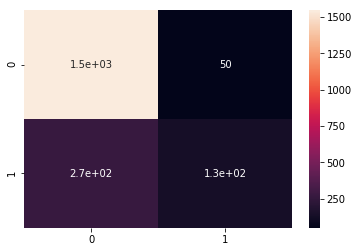

In [26]:
sn.heatmap(cm,annot= True)
plt.show()